In [3]:
import pandas as pd
import matplotlib.pyplot as plt

df=pd.read_json("C:\\Users\\L\\Downloads\\final_year_1_to_10_data.json")
y11=pd.read_json('C:\\Users\\L\\Downloads\\final_year_11_data.json')
knn=pd.read_json("C:\\Users\\L\\Downloads\\knn_hyper_param_tuning.json")


In [75]:
#####TESTING MODEL
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_digits


features = ['averageWinRate', 'averageRebounds', 'averageBlocks', 'averageThreeRatio', 'coachWinRate', 'numberOfAwardedPlayers', 'year']
target = 'playoff'

acc_test_val=[]
acc_train_val=[]
year_val=[]
for i in range(5,10):

    X_train = df[df["year"] < i][features]
    X_test = df[df["year"] >= i][features]
    y_train = df[df["year"] < i][target]
    y_test = df[df["year"] >= i][target]

    model = LogisticRegression(C=0.1, penalty= 'l2', solver= 'newton-cg', tol= 0.001, max_iter= 10000)
    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)
    y_pred_train=model.predict(X_train)

    accuracy = accuracy_score(y_test,y_pred)
    acc_train=accuracy_score(y_train,y_pred_train)

    #print(f'Accuracy test: {accuracy}')
    #print(f'Accuracy train: {acc_train}')

    acc_test_val.append(accuracy)
    acc_train_val.append(acc_train)
    year_val.append(i)


In [76]:
#####TESTING MODEL bad example
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_digits


features = ['averageSteals', 'averageBlocks', 'averageTurnovers', 'coachWinRate', 'numberOfAwardedPlayers']
target = 'playoff'

acc_test_val_bad=[]
acc_train_val_bad=[]
year_val_bad=[]
for i in range(5,10):

    X_train = df[df["year"] < i][features]
    X_test = df[df["year"] >= i][features]
    y_train = df[df["year"] < i][target]
    y_test = df[df["year"] >= i][target]

    model = LogisticRegression(C=10, penalty='l2',solver='liblinear')
    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)
    y_pred_train=model.predict(X_train)

    accuracy = accuracy_score(y_test,y_pred)
    acc_train=accuracy_score(y_train,y_pred_train)

    #print(f'Accuracy test: {accuracy}')
    #print(f'Accuracy train: {acc_train}')

    acc_test_val_bad.append(accuracy)
    acc_train_val_bad.append(acc_train)
    year_val_bad.append(i)


In [4]:
####TESTING MODEL knn
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_digits
from sklearn.neighbors import KNeighborsClassifier 


features = ['averagePoints', 'averageRebounds', 'averageBlocks', 'averageTurnovers', 'numberOfAwardedPlayers', 'year']
target = 'playoff'

acc_test_knn=[]
acc_train_knn=[]
year_val_knn=[]
for i in range(5,10):

    X_train = df[df["year"] < i][features]
    X_test = df[df["year"] >= i][features]
    y_train = df[df["year"] < i][target]
    y_test = df[df["year"] >= i][target]

    model = KNeighborsClassifier(n_neighbors= 9, weights= 'uniform', metric= 'manhattan')
    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)
    y_pred_train=model.predict(X_train)

    accuracy = accuracy_score(y_test,y_pred)
    acc_train=accuracy_score(y_train,y_pred_train)

    #print(f'Accuracy test: {accuracy}')
    #print(f'Accuracy train: {acc_train}')

    acc_test_knn.append(accuracy)
    acc_train_knn.append(acc_train)
    year_val_knn.append(i)

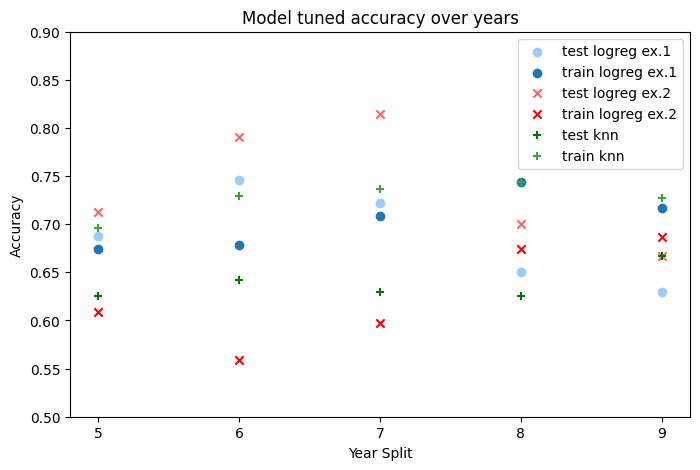

In [121]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
plt.figure(figsize=(8,5))

plt.scatter(year_val,acc_test_val,label='test logreg ex.1',color=(153/255,204/255,255/255))
plt.scatter(year_val,acc_train_val,label='train logreg ex.1')

plt.scatter(year_val_bad,acc_test_val_bad,label='test logreg ex.2',marker='x',color=(255/255,100/255,100/255))
plt.scatter(year_val_bad,acc_train_val_bad,label='train logreg ex.2',marker='x',color=(255/255,0/255,0/255))

plt.scatter(year_val_knn,acc_test_knn,label='test knn',marker='+',color=(1/255,117/255,3/255))
plt.scatter(year_val_knn,acc_train_knn,label='train knn',marker='+',color=(63/255,162/255,59/255))

plt.ylim(0.5,0.9)
plt.gca().xaxis.set_major_locator(ticker.FixedLocator(year_val))

plt.title('Model tuned accuracy over years')
plt.ylabel('Accuracy')
plt.xlabel('Year Split')

plt.legend()
